In [57]:
import pandas as pd
import numpy as np

data= pd.read_excel('../../../source/car-data-category-encoding.xlsx', sheet_name='Sheet1')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [58]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


# 2 Create Python functions (one for each of the encoding methods) 
to accept as inputs a dataframe and a target column, and return a new dataframe with all columns encoded, except the target column, using the following methods: (Can you create just one function to handle all the below methods, instead of creating separate one for each?) (Which Python module implements all the below methods? Find out)
a. Integer or Ordinal encoding
b. One-hot encoding
c. Binary encoding
d. Target encoding
e. Frequency encoding

In [59]:
from category_encoders import OrdinalEncoder, OneHotEncoder, BinaryEncoder, TargetEncoder
import pandas as pd

def encode_dataframe(df, target_column, method):
    """
    Encodes all columns in the DataFrame except the target column using the specified method.

    Parameters:
        df (pd.DataFrame): The input DataFrame.
        target_column (str): The name of the target column to exclude from encoding.
        method (str): The encoding method to use. Options are:
                      'integer', 'onehot', 'binary', 'target', 'frequency'.

    Returns:
        pd.DataFrame: A new DataFrame with the specified encoding applied.
    """
    encoded_df = df.copy()
    
    if method == 'integer' or method == 'ordinal':
        encoder = OrdinalEncoder(cols=[col for col in df.columns if col != target_column])
        encoded_df = encoder.fit_transform(encoded_df)
    
    elif method == 'onehot':
        encoder = OneHotEncoder(cols=[col for col in df.columns if col != target_column], use_cat_names=True)
        encoded_df = encoder.fit_transform(encoded_df)
    
    elif method == 'binary':
        encoder = BinaryEncoder(cols=[col for col in df.columns if col != target_column])
        encoded_df = encoder.fit_transform(encoded_df)
    
    elif method == 'target':
        encoder = TargetEncoder(cols=[col for col in df.columns if col != target_column])
        encoded_df = encoder.fit_transform(encoded_df, encoded_df[target_column])
    
    elif method == 'frequency':
        for col in df.columns:
            if col != target_column:
                freq = df[col].value_counts() / len(df)
                encoded_df[col] = df[col].map(freq)
    
    else:
        raise ValueError("Unsupported encoding method. Choose from 'integer', 'onehot', 'binary', 'target', or 'frequency'.")
    
    return encoded_df

In [61]:
# Example usage:
encoded_data_one_integer = encode_dataframe(data, target_column='class', method='integer')

encoded_data_one_integer.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,1,1,1,1,1,1,unacc
1,1,1,1,1,1,2,unacc
2,1,1,1,1,1,3,unacc
3,1,1,1,1,2,1,unacc
4,1,1,1,1,2,2,unacc


In [62]:
# Example usage:
encoded_data_one_hot = encode_dataframe(data, target_column='class', method='onehot')

encoded_data_one_hot.head()

,buying_vhigh,buying_high,buying_med,buying_low,maint_vhigh,maint_high,maint_med,maint_low,doors_2,doors_3,...,persons_2,persons_4,persons_more,lug_boot_small,lug_boot_med,lug_boot_big,safety_low,safety_med,safety_high,class
0,1,0,0,0,1,0,0,0,1,0,...,1,0,0,1,0,0,1,0,0,unacc
1,1,0,0,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,1,0,unacc
2,1,0,0,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,unacc
3,1,0,0,0,1,0,0,0,1,0,...,1,0,0,0,1,0,1,0,0,unacc
4,1,0,0,0,1,0,0,0,1,0,...,1,0,0,0,1,0,0,1,0,unacc


In [63]:
# Example usage:
encoded_data_binary = encode_dataframe(data, target_column='class', method='binary')

encoded_data_binary.head()

,buying_0,buying_1,buying_2,maint_0,maint_1,maint_2,doors_0,doors_1,doors_2,persons_0,persons_1,lug_boot_0,lug_boot_1,safety_0,safety_1,class
0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,unacc
1,0,0,1,0,0,1,0,0,1,0,1,0,1,1,0,unacc
2,0,0,1,0,0,1,0,0,1,0,1,0,1,1,1,unacc
3,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1,unacc
4,0,0,1,0,0,1,0,0,1,0,1,1,0,1,0,unacc


In [9]:
# Example usage:
encoded_data_target = encode_dataframe(data, target_column='class', method='target')

encoded_data_target.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,1.666667,1.666667,1.613426,2.0,1.598958,2.000000,unacc
1,1.666667,1.666667,1.613426,2.0,1.598958,1.307292,unacc
2,1.666667,1.666667,1.613426,2.0,1.598958,1.352431,unacc
3,1.666667,1.666667,1.613426,2.0,1.532986,2.000000,unacc
4,1.666667,1.666667,1.613426,2.0,1.532986,1.307292,unacc


In [97]:
# Example usage:
encoded_data_frequency = encode_dataframe(data, target_column='class', method='frequency')

encoded_data_frequency.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,0.25,0.25,0.25,0.333333,0.333333,0.333333,unacc
1,0.25,0.25,0.25,0.333333,0.333333,0.333333,unacc
2,0.25,0.25,0.25,0.333333,0.333333,0.333333,unacc
3,0.25,0.25,0.25,0.333333,0.333333,0.333333,unacc
4,0.25,0.25,0.25,0.333333,0.333333,0.333333,unacc


# 3 Using each of the above encoded dataframes carry out the following steps:

a. Split the available data into train / test sets
b. Create a classification model (e.g. Random Forest Classification) to predict the “class” using all the other columns.
c. Derive the test and train metrics for each class: Precision, recall, F1-score, overall accuracy, and save these metrics in a dataframe.
d. Create and print the Confusion Matrix.

In [159]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import pandas as pd

def evaluate_model(encoded_df, target_column):
    """
    Splits the data, trains a Random Forest Classifier, and evaluates the model.
    
    Parameters:
        encoded_df (pd.DataFrame): The encoded DataFrame.
        target_column (str): The target column name.
    
    Returns:
        pd.DataFrame: DataFrame containing precision, recall, F1-score, and accuracy.
        np.ndarray: Confusion matrix.
    """
    # Split data into features (X) and target (y)
    X = encoded_df.drop(columns=[target_column])
    y = encoded_df[target_column]
    
    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
    
    # Train Random Forest Classifier
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_proba= model.predict_proba(X_test)
    # Calculate metrics
    report = classification_report(y_test, y_pred, output_dict=True)
    metrics_df = pd.DataFrame(report).transpose()
    overall_accuracy = accuracy_score(y_test, y_pred)
    
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    return overall_accuracy, metrics_df, conf_matrix, y_proba, y_test 

In [178]:

import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix for one of the encoded datasets
def plot_confusion_matrix(conf_matrix, class_names):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xticks(rotation=45) 
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt


In [176]:
# Example usage for each encoded DataFrame

# Integer/Ordinal Encoding
overall_accuracy_iteger, metrics_integer, conf_matrix_integer, y_proba_int, y_test_int = evaluate_model(encoded_data_one_integer, target_column='class')
print("Metrics for Integer/Ordinal Encoding:")
metrics_integer

# print("Accuracy:", metrics_integer.loc['accuracy'])


Metrics for Integer/Ordinal Encoding:


,precision,recall,f1-score,support
acc,0.933884,0.982609,0.957627,115.000000
good,0.952381,0.952381,0.952381,21.000000
unacc,0.994429,0.983471,0.988920,363.000000
vgood,1.000000,0.900000,0.947368,20.000000
accuracy,0.978805,0.978805,0.978805,0.978805
macro avg,0.970174,0.954615,0.961574,519.000000
weighted avg,0.979527,0.978805,0.978906,519.000000


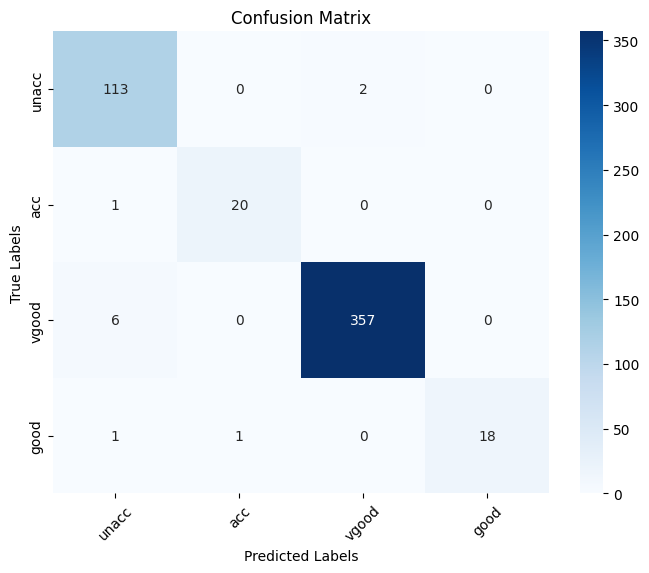

In [179]:
# Plot confusion matrix 
plot_confusion_matrix(conf_matrix_integer, class_names=encoded_data_one_integer['class'].unique().tolist())


In [98]:
# overall accuracy 

overall_accuracy_iteger

0.9633911368015414

In [165]:
# Example usage for each encoded DataFrame

# Integer/Ordinal Encoding
overall_accuracy_one_hot, metrics_one_hot, conf_matrix_one_hot, y_proba_one_hot, y_test_onehot= evaluate_model(encoded_data_one_hot, target_column='class')
print("Metrics for one Encoding:")
metrics_one_hot

# print("Accuracy:", metrics_integer.loc['accuracy'])


Metrics for one Encoding:


,precision,recall,f1-score,support
acc,0.916667,0.956522,0.936170,115.000000
good,1.000000,0.809524,0.894737,21.000000
unacc,0.988920,0.983471,0.986188,363.000000
vgood,0.904762,0.950000,0.926829,20.000000
accuracy,0.969171,0.969171,0.969171,0.969171
macro avg,0.952587,0.924879,0.935981,519.000000
weighted avg,0.970115,0.969171,0.969117,519.000000


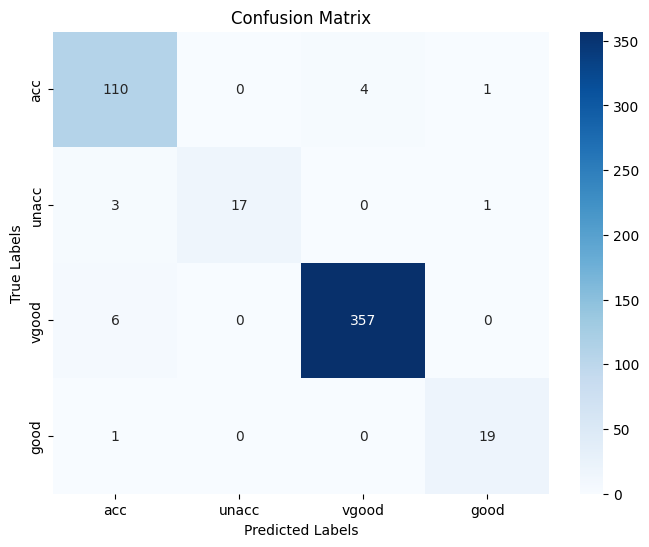

In [166]:
plot_confusion_matrix(conf_matrix_one_hot, class_names=y_test_int.unique().tolist())  

In [88]:
overall_accuracy_one_hot

0.9576107899807321

In [168]:

# Binary Encoding
overall_accuracy_binary, metrics_binary, conf_matrix_binary,y_proba_bin, y_test_bin= evaluate_model(encoded_data_binary, target_column='class')
print("\nMetrics for Binary Encoding:")
metrics_binary


Metrics for Binary Encoding:


,precision,recall,f1-score,support
acc,0.746032,0.817391,0.780083,115.000000
good,0.900000,0.428571,0.580645,21.000000
unacc,0.945652,0.958678,0.952120,363.000000
vgood,1.000000,0.750000,0.857143,20.000000
accuracy,0.897881,0.897881,0.897881,0.897881
macro avg,0.897921,0.738660,0.792498,519.000000
weighted avg,0.901667,0.897881,0.895310,519.000000



Confusion Matrix:


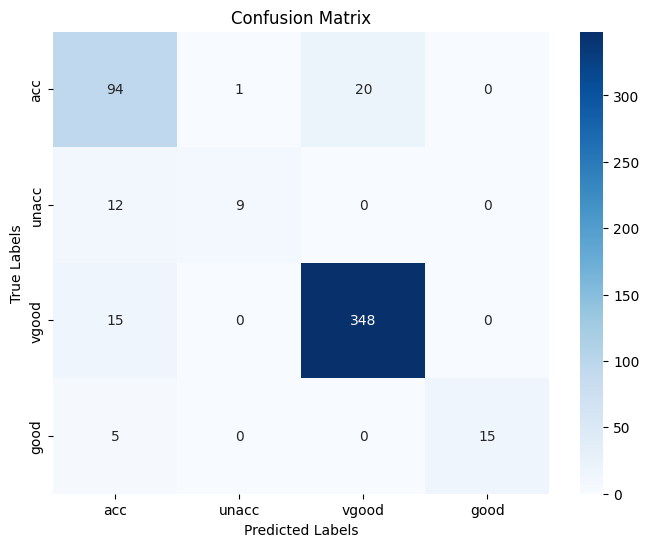

In [171]:
print("\nConfusion Matrix:")
plot_confusion_matrix(conf_matrix_binary, class_names=y_test_int.unique().tolist())  

In [91]:
overall_accuracy_binary

0.882466281310212

In [170]:
# Target Encoding 
overall_accuracy_target, metrics_target, conf_matrix_target,y_proba_target, y_test_target = evaluate_model(encoded_data_target, target_column='class')
print("\nMetrics for Target Encoding:")
metrics_target


Metrics for Target Encoding:


,precision,recall,f1-score,support
acc,0.914530,0.930435,0.922414,115.000000
good,0.947368,0.857143,0.900000,21.000000
unacc,0.980663,0.977961,0.979310,363.000000
vgood,0.952381,1.000000,0.975610,20.000000
accuracy,0.963391,0.963391,0.963391,0.963391
macro avg,0.948736,0.941385,0.944333,519.000000
weighted avg,0.963572,0.963391,0.963352,519.000000



Confusion Matrix:


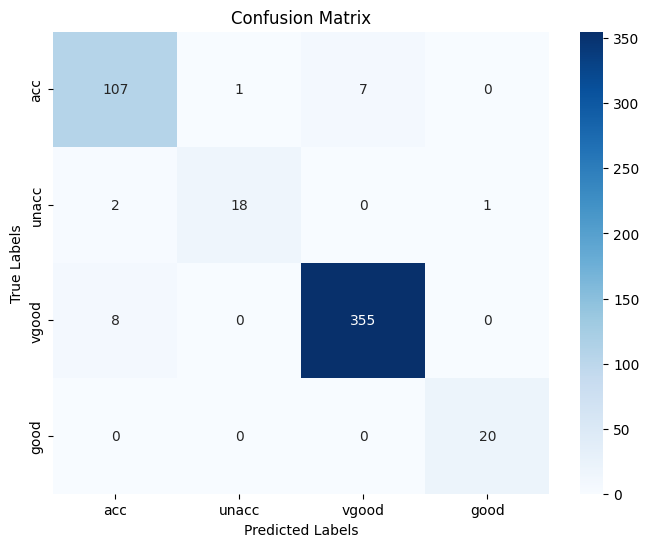

In [172]:

print("\nConfusion Matrix:")
plot_confusion_matrix(conf_matrix_target, class_names=y_test_int.unique().tolist())  

In [94]:
overall_accuracy_target

0.9710982658959537

In [ ]:
# frequency Encoding 
overall_accuracy_frequency, metrics_frequency, conf_matrix_frequency,y_proba_freq, y_test_freq = evaluate_model(encoded_data_frequency, target_column='class')
print("\nMetrics for frequency Encoding:")
metrics_frequency


Metrics for frequency Encoding:


/home/ruksad/Documents/learn/AIandContent/GL-selflearning/descriptive-stats/local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ruksad/Documents/learn/AIandContent/GL-selflearning/descriptive-stats/local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ruksad/Documents/learn/AIandContent/GL-selflearning/descriptive-stats/local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in

,precision,recall,f1-score,support
acc,0.000000,0.000000,0.000000,118.000000
good,0.000000,0.000000,0.000000,19.000000
unacc,0.689788,1.000000,0.816420,358.000000
vgood,0.000000,0.000000,0.000000,24.000000
accuracy,0.689788,0.689788,0.689788,0.689788
macro avg,0.172447,0.250000,0.204105,519.000000
weighted avg,0.475808,0.689788,0.563156,519.000000


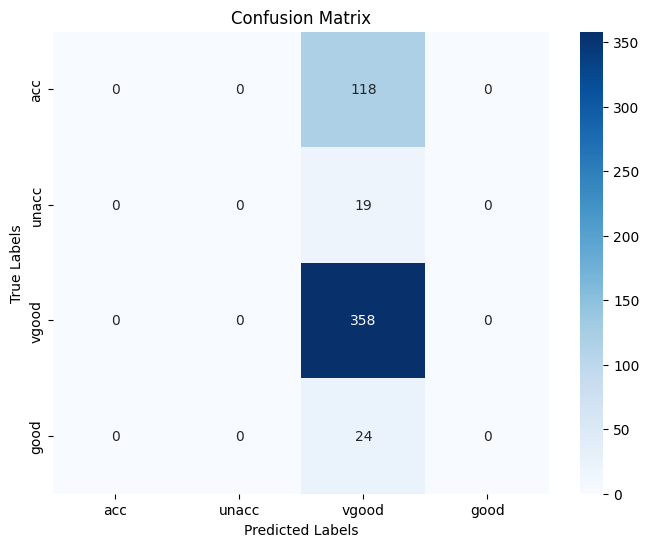

In [173]:
plot_confusion_matrix(conf_matrix_frequency, class_names=y_test_int.unique().tolist())  

In [ ]:
# Consolidate metrics for comparison
    summary_metrics = pd.DataFrame({
        "Encoding Method": ["Integer/Ordinal", "One-hot", "Binary", "Target", "Frequency"],
        "Accuracy": [
            overall_accuracy_iteger,
            overall_accuracy_one_hot,
            overall_accuracy_binary,
            overall_accuracy_target,
            overall_accuracy_frequency
        ],
        "Precision (Macro Avg)": [
            metrics_integer.loc["macro avg", "precision"],
            metrics_one_hot.loc["macro avg", "precision"],
            metrics_binary.loc["macro avg", "precision"],
            metrics_target.loc["macro avg", "precision"],
            metrics_frequency.loc["macro avg", "precision"]
        ],
        "Recall (Macro Avg)": [
            metrics_integer.loc["macro avg", "recall"],
            metrics_one_hot.loc["macro avg", "recall"],
            metrics_binary.loc["macro avg", "recall"],
            metrics_target.loc["macro avg", "recall"],
            metrics_frequency.loc["macro avg", "recall"]
        ],
        "F1-Score (Macro Avg)": [
            metrics_integer.loc["macro avg", "f1-score"],
            metrics_one_hot.loc["macro avg", "f1-score"],
            metrics_binary.loc["macro avg", "f1-score"],
            metrics_target.loc["macro avg", "f1-score"],
            metrics_frequency.loc["macro avg", "f1-score"]
        ]
    })

# Display the summary metrics
print("Summary of Metrics for Each Encoding Method:")
summary_metrics

Summary of Metrics for Each Encoding Method:


,Encoding Method,Accuracy,Precision (Macro Avg),Recall (Macro Avg),F1-Score (Macro Avg)
0,Integer/Ordinal,0.963391,0.898710,0.905995,0.901733
1,One-hot,0.957611,0.870160,0.865126,0.864886
2,Binary,0.882466,0.719091,0.594907,0.627853
3,Target,0.971098,0.913765,0.932486,0.922891
4,Frequency,0.689788,0.172447,0.250000,0.204105
